In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings("ignore")

In [8]:
# Train sets
X_train = pd.read_csv('./Datasets/x_train.csv')
y_train = pd.read_csv('./Datasets/y_train.csv')

# Validation sets
X_valid = pd.read_csv('./Datasets/x_valid.csv')
y_valid = pd.read_csv('./Datasets/y_valid.csv')

# Test sets
X_test = pd.read_csv('./Datasets/x_test.csv')
y_test = pd.read_csv('./Datasets/y_test.csv')

#### Base XGBoost with Performance Metrics

Performance Metric for XGBoost on Validation Set
Validation Accuracy: 0.8540860735009671
Precision: 0.6885521885521886
Recall: 0.49425981873111785
F1 Score: 0.5754484699261344
AUC: 0.8647385864570203


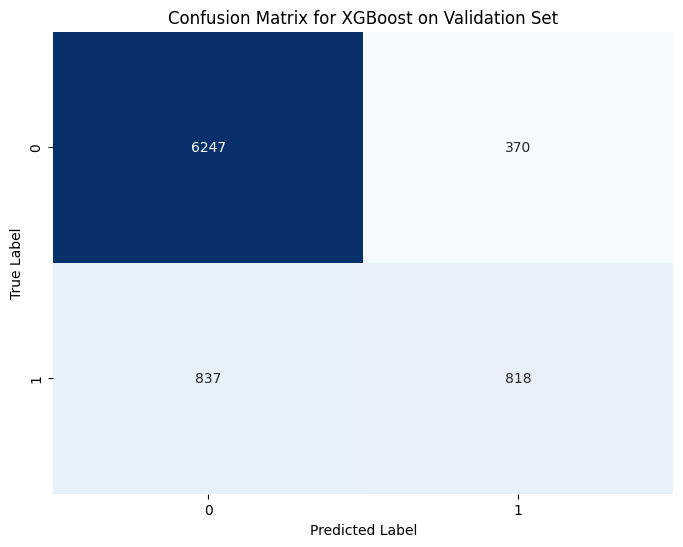

-----------------------------------------------------------------
Performance Metric for XGBoost on Testing Set
Validation Accuracy: 0.8557785299806576
Precision: 0.6951735817104149
Recall: 0.496372430471584
F1 Score: 0.5791887125220458
AUC: 0.7209876658250939


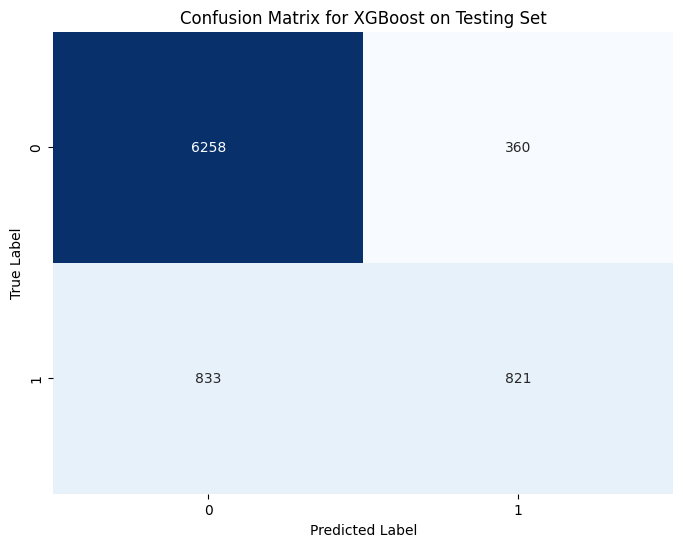

In [9]:
model = 'XGBoost'

# Create an XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=0)
xgb_classifier.fit(X_train, y_train)

# Predictions for model on validation & testing set
y_valid_pred = xgb_classifier.predict(X_valid)
y_test_pred = xgb_classifier.predict(X_test)

# Performance metrics on Validation Set
set_type = 'Validation'
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)
y_valid_prob = xgb_classifier.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_valid_prob)
print(f'Performance Metric for {model} on {set_type} Set')
print(f"Validation Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")  
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=xgb_classifier.classes_, yticklabels=xgb_classifier.classes_)
plt.title(f"Confusion Matrix for {model} on {set_type} Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("-----------------------------------------------------------------")

# Performance metrics on Testing Set
set_type = 'Testing'
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
y_test_prob = xgb_classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_test_pred)
print(f'Performance Metric for {model} on {set_type} Set')
print(f"Validation Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}") 
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=xgb_classifier.classes_, yticklabels=xgb_classifier.classes_)
plt.title(f"Confusion Matrix for {model} on {set_type} Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Parameters of Base XGB model

In [10]:
xgb_classifier.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 0,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### Hyperparameter Tuning for XGBoost Model with Performance Metrics

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0; tot

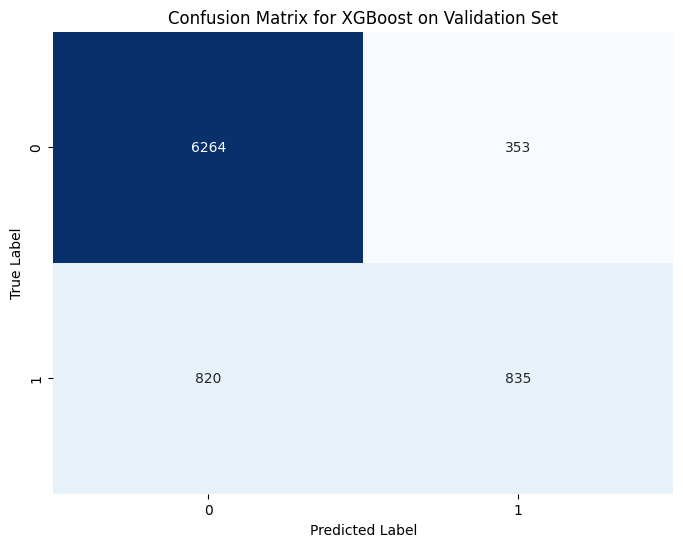

-----------------------------------------------------------------
Performance Metric for XGBoost on Testing Set
Validation Accuracy: 0.8560203094777563
Precision: 0.6950294860994103
Recall: 0.4987908101571947
F1 Score: 0.5807814149947201
AUC: 0.7220457526156175


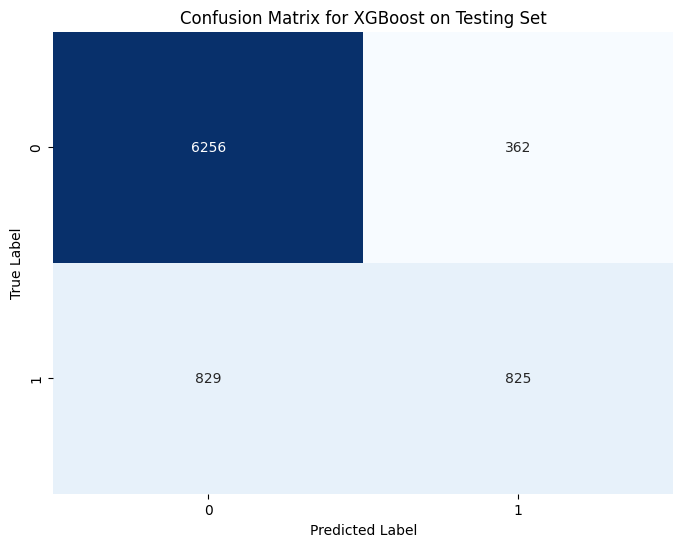

In [11]:
# Create an XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=0)

# Hyperparameter grid to search
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Random Search
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    n_iter=50,            # Number of random combinations to try
    scoring='f1',    # Use an appropriate metric for your problem
    cv=5,                 # 5-fold cross-validation
    verbose=2,
    n_jobs=-1             # Use all available CPU cores
)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Best Model after RandomSearch
best_xgb_classifier = random_search.best_estimator_
best_xgb_classifier.fit(X_train, y_train)

# Predictions for model on validation & testing set
y_valid_pred = best_xgb_classifier.predict(X_valid)
y_test_pred = best_xgb_classifier.predict(X_test)

# Performance metrics on Validation Set
set_type = 'Validation'
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)
y_valid_prob = best_xgb_classifier.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_valid_prob)
print(f'Performance Metric for {model} on {set_type} Set')
print(f"Validation Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")  
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=best_xgb_classifier.classes_, yticklabels=best_xgb_classifier.classes_)
plt.title(f"Confusion Matrix for {model} on {set_type} Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("-----------------------------------------------------------------")

# Performance metrics on Testing Set
set_type = 'Testing'
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
y_test_prob = best_xgb_classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_test_pred)
print(f'Performance Metric for {model} on {set_type} Set')
print(f"Validation Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}") 
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=best_xgb_classifier.classes_, yticklabels=best_xgb_classifier.classes_)
plt.title(f"Confusion Matrix for {model} on {set_type} Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Parameters of Tuned XGB model

In [12]:
best_xgb_classifier.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 200,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 0,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}